In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [7]:
customer_df=customer_df.drop(["customer"], axis=1)

In [8]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [9]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

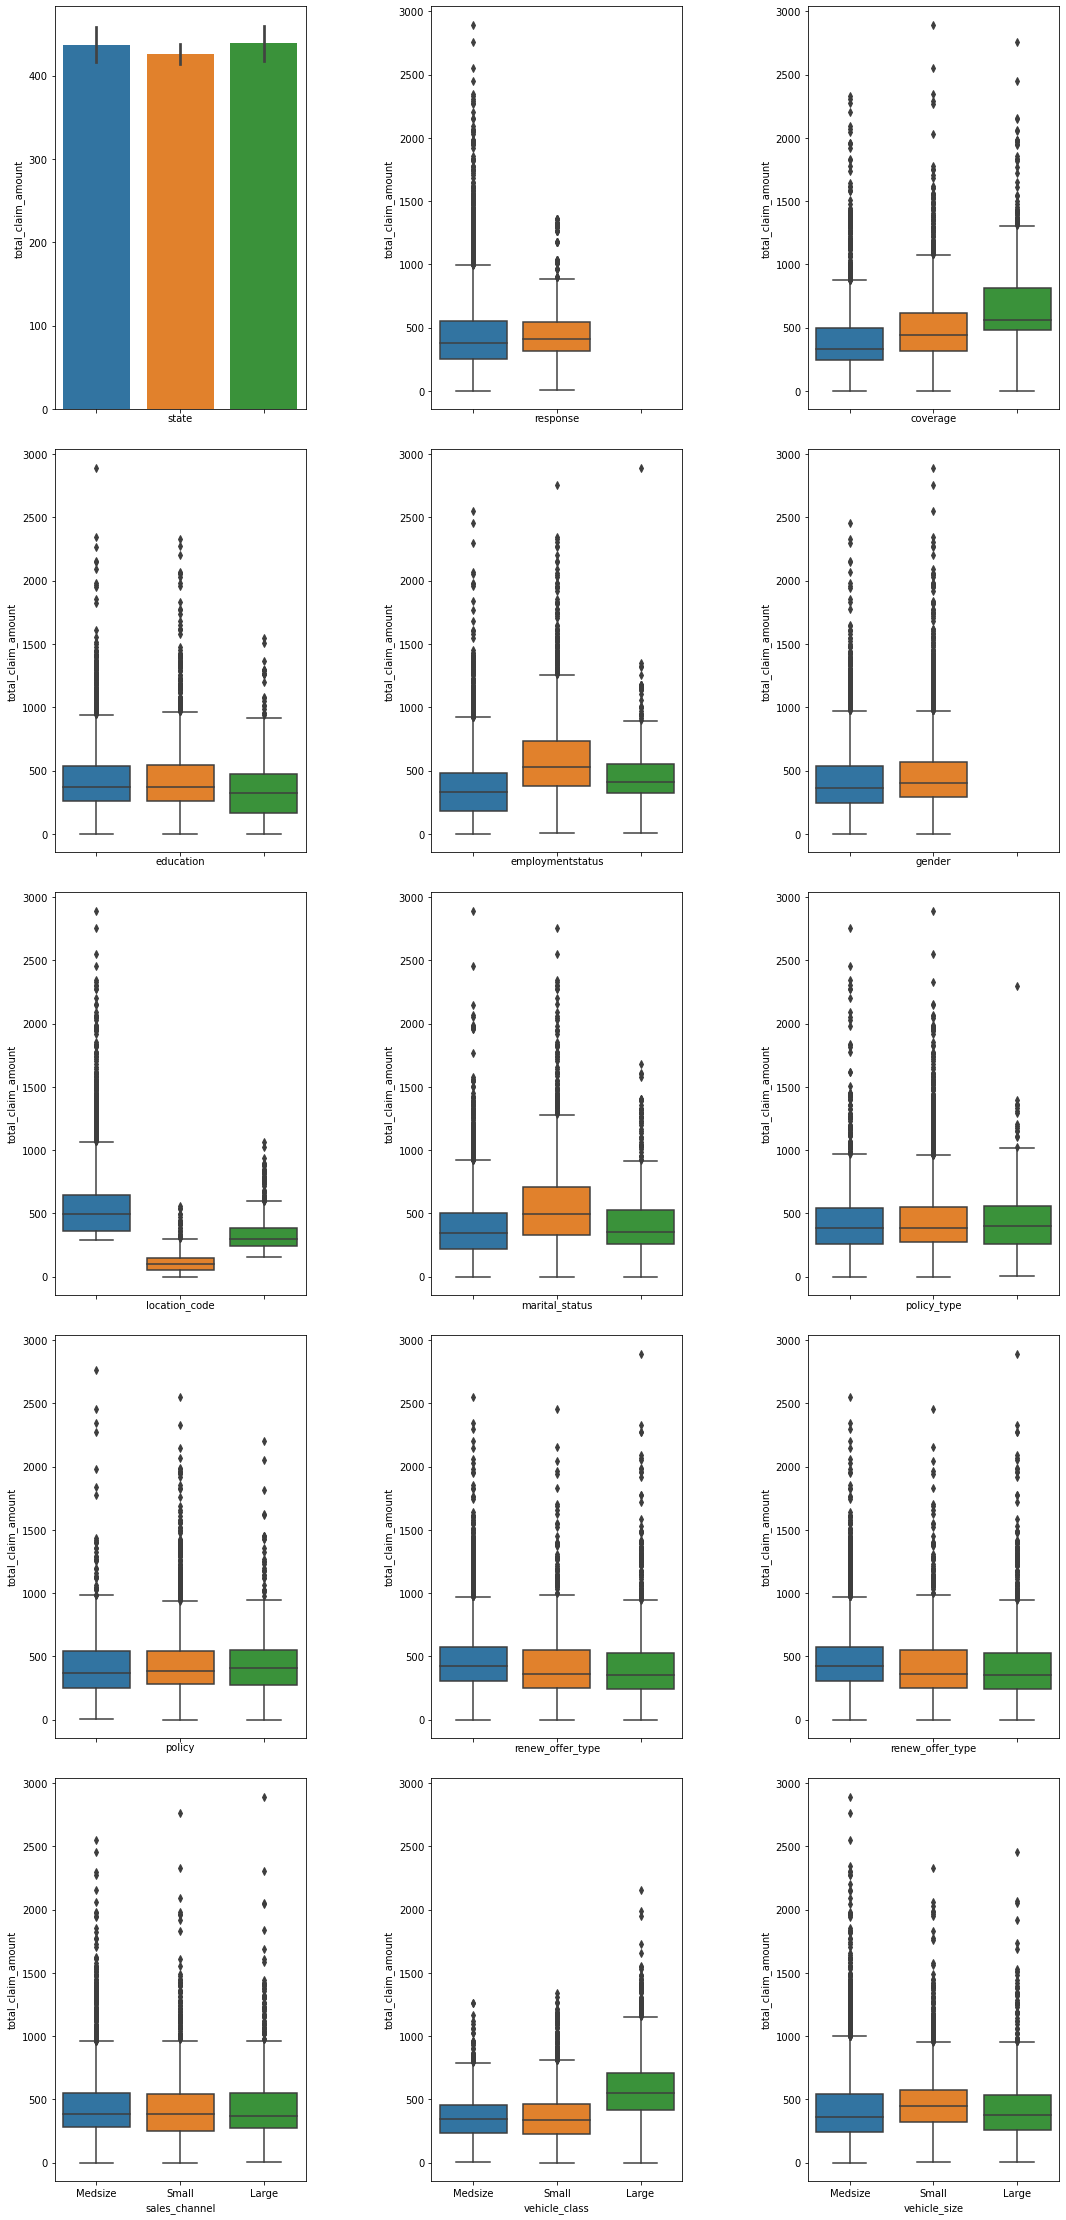

In [11]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40))

fig.subplots_adjust(hspace=0.1, wspace=.5) 

sns.barplot(ax=axes[0, 0], data=customer_df, x="state", y="total_claim_amount")
sns.boxplot(ax=axes[0, 1], data=customer_df, x="response", y="total_claim_amount")
sns.boxplot(ax=axes[0, 2], data=customer_df, x="coverage", y="total_claim_amount")
sns.boxplot(ax=axes[1, 0], data=customer_df, x="education", y="total_claim_amount")
sns.boxplot(ax=axes[1, 1], data=customer_df, x="employmentstatus", y="total_claim_amount")
sns.boxplot(ax=axes[1, 2], data=customer_df, x="gender", y="total_claim_amount")
sns.boxplot(ax=axes[2, 0], data=customer_df, x="location_code", y="total_claim_amount")
sns.boxplot(ax=axes[2, 1], data=customer_df, x="marital_status", y="total_claim_amount")
sns.boxplot(ax=axes[2, 2], data=customer_df, x="policy_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 0], data=customer_df, x="policy", y="total_claim_amount")
sns.boxplot(ax=axes[3, 1], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 2], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[4, 0], data=customer_df, x="sales_channel", y="total_claim_amount")
sns.boxplot(ax=axes[4, 1], data=customer_df, x="vehicle_class", y="total_claim_amount")
sns.boxplot(ax=axes[4, 2], data=customer_df, x="vehicle_size", y="total_claim_amount")

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [12]:
numericals.shape

(9134, 8)

In [13]:
for column in numericals.columns:
    iqr = np.percentile(numericals[column],75) - np.percentile(numericals[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(numericals[column],75) + 1.5*iqr
    lower_limit = np.percentile(numericals[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(numericals.loc[(numericals[column]>upper_limit) | (numericals[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)


Feature name:  customer_lifetime_value  | Upper limit:  16414.039911750002  | Lower limit:  -3457.6210762500014
Number of exclusions would be  817

Feature name:  income  | Upper limit:  155800.0  | Lower limit:  -93480.0
Number of exclusions would be  0

Feature name:  monthly_premium_auto  | Upper limit:  170.5  | Lower limit:  6.5
Number of exclusions would be  430

Feature name:  months_since_last_claim  | Upper limit:  48.5  | Lower limit:  -19.5
Number of exclusions would be  0

Feature name:  months_since_policy_inception  | Upper limit:  141.5  | Lower limit:  -46.5
Number of exclusions would be  0

Feature name:  number_of_open_complaints  | Upper limit:  0.0  | Lower limit:  0.0
Number of exclusions would be  1882

Feature name:  number_of_policies  | Upper limit:  8.5  | Lower limit:  -3.5
Number of exclusions would be  416

Feature name:  total_claim_amount  | Upper limit:  960.3997301249999  | Lower limit:  -140.62664687499995
Number of exclusions would be  453


In [14]:
def remove_outliers(numericals):
    for i in numericals.columns:
        Q1 = numericals[i].quantile(0.25)
        Q3 = numericals[i].quantile(0.75)
        IQR = Q3 - Q1
    
        numericals = numericals[~((numericals[i] < (Q1 - 1.5 * IQR)) | (numericals[i] > (Q3 + 1.5 * IQR)))]

    return numericals


In [15]:
numericals=remove_outliers(numericals)

In [16]:
numericals.shape

(5888, 8)

###  2.Create a copy of the dataframe for the data wrangling.


In [17]:
categoricals

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [18]:
customer_df2 = customer_df.copy()
numericals1 = numericals.copy()
categoricals1 = categoricals[['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']].copy()
categoricals2= categoricals[['coverage','employmentstatus','location_code','vehicle_size']].copy()

### 3.Normalize the continuous variables. You can use any one method you want.


In [19]:
scaler = MinMaxScaler()

In [20]:
for column in numericals1.columns:
    scaler.fit(numericals1[column].values.reshape(-1, 1))
    numericals1[column] = scaler.transform(numericals1[column].values.reshape(-1, 1))

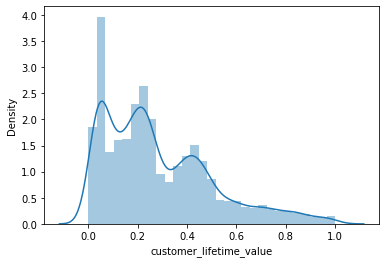

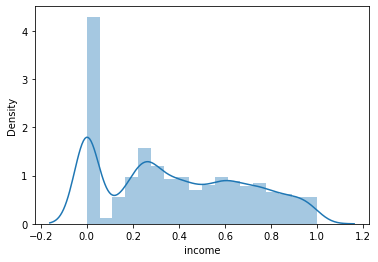

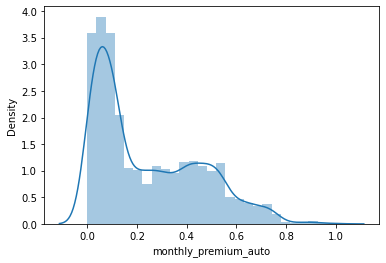

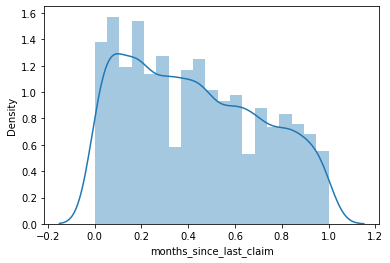

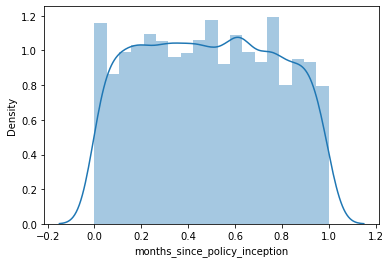

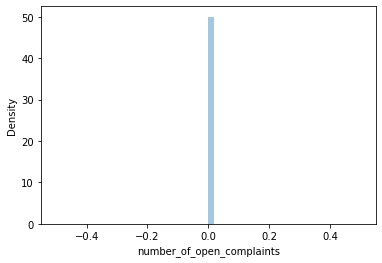

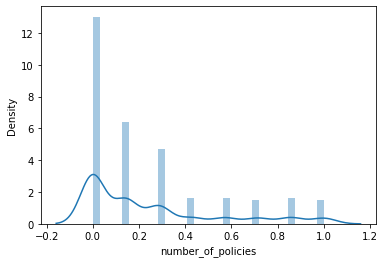

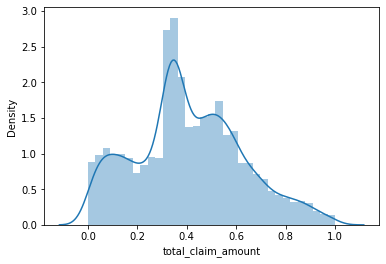

In [21]:
for column in numericals1.columns:
    sns.distplot(numericals1[column])
    plt.show()

### 4.Encode the categorical variables


***OneHotEncoder***

In [22]:
encoder = LabelEncoder()
for column in categoricals1:
    encoder.fit(categoricals1[column])
    categoricals1[column] = encoder.transform(categoricals1[column])

In [23]:
categoricals1

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,4,1,0,2,0,0,5
1,0,2,1,5,2,0,0
2,2,1,1,5,0,0,5
3,1,1,0,1,0,2,3
4,4,2,1,3,0,0,0
...,...,...,...,...,...,...,...
9129,1,1,1,3,1,3,0
9130,1,0,0,2,0,1,0
9131,1,2,0,1,0,1,0
9132,1,1,1,4,2,1,0


***OrdinalEncoding***

In [25]:
categoricals2["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [26]:
categoricals2["coverage"] = categoricals2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [27]:
categoricals2["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [28]:
categoricals2["employmentstatus"] = categoricals2["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2,
                                                                          'Disabled': 3,'Retired': 4})

In [29]:
categoricals2["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [30]:
categoricals2["location_code"] = categoricals2["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [31]:
categoricals2["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [32]:
categoricals2["vehicle_size"] = categoricals2["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [38]:
categoricals3 = pd.concat([categoricals1, categoricals2],axis=1)
categoricals3

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,coverage,employmentstatus,location_code,vehicle_size
0,4,1,0,2,0,0,5,0,0,0,0
1,0,2,1,5,2,0,0,1,1,0,0
2,2,1,1,5,0,0,5,2,0,0,0
3,1,1,0,1,0,2,3,0,1,0,0
4,4,2,1,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9129,1,1,1,3,1,3,0,0,0,2,0
9130,1,0,0,2,0,1,0,1,0,0,0
9131,1,2,0,1,0,1,0,1,1,0,0
9132,1,1,1,4,2,1,0,1,0,0,2


### 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [40]:
from datetime import datetime

In [42]:
def transform_date(customer_df2, column):
    customer_df2['day'] = customer_df2[column].dt.strftime("%d")
    customer_df2['week_of_year'] = customer_df2[column].dt.strftime("%W")
    customer_df2['year'] = customer_df2[column].dt.strftime("%Y")
    customer_df2 = customer_df2.drop(column, axis=1)
    return customer_df2

In [43]:
customer_df2 = transform_date(customer_df2, 'effective_to_date')

In [44]:
date = customer_df2[['day','week_of_year','year']]
date

,day,week_of_year,year
0,24,08,2011
1,31,05,2011
2,19,07,2011
3,20,03,2011
4,03,05,2011
...,...,...,...
9129,10,06,2011
9130,12,06,2011
9131,06,05,2011
9132,03,05,2011
